In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import numpy as np
import warnings
from pandas.api.types import is_numeric_dtype
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import scipy.stats as stats
import statsmodels.api as sm
import json
import requests

warnings.filterwarnings('ignore')

In [115]:
import importlib
import sys
import os
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))

print(parent_dir)
sys.path.insert(0,parent_dir)
import data_manipulation.data_transform as dat

importlib.reload(dat)

/home/cody/Documents/DataSciBC/EPLTransfer


<module 'data_manipulation.data_transform' from '/home/cody/Documents/DataSciBC/EPLTransfer/data_manipulation/data_transform.py'>

In [116]:
main_data_path = "../../data/main_data/train/train.csv"
train = pd.read_csv(main_data_path)
train = dat.transformer(train).data

In [117]:
train.head()


,height,market_value,minutesPlayed,totalLongBalls,keyPass,totalPass,totalCross,goalAssist,savedShotsFromInsideTheBox,saves,...,xGChain,xGBuildup,age,pos_D,pos_F,pos_G,pos_M,foot_both,foot_left,foot_right
0,182.0,16.300417,2435,32,28,705,55,6,0,0,...,0.265086,0.102528,23.0,False,False,False,True,False,True,False
1,180.0,13.815512,2945,95,16,863,12,2,0,0,...,0.000000,0.000000,29.0,False,False,False,True,False,False,True
2,178.0,12.206078,20,2,0,11,0,0,0,0,...,0.000000,0.000000,19.0,False,False,False,True,False,False,True
3,173.0,15.201805,10138,201,123,2484,549,9,0,0,...,0.225306,0.110556,31.0,False,False,False,True,False,True,False
4,179.0,11.512935,3764,277,20,1567,56,2,0,0,...,0.000000,0.000000,35.0,True,False,False,False,False,False,True


In [118]:
train_drop = train

In [119]:
train_drop

,height,market_value,minutesPlayed,totalLongBalls,keyPass,totalPass,totalCross,goalAssist,savedShotsFromInsideTheBox,saves,...,xGChain,xGBuildup,age,pos_D,pos_F,pos_G,pos_M,foot_both,foot_left,foot_right
0,182.0,16.300417,2435,32,28,705,55,6,0,0,...,0.265086,0.102528,23.0,False,False,False,True,False,True,False
1,180.0,13.815512,2945,95,16,863,12,2,0,0,...,0.000000,0.000000,29.0,False,False,False,True,False,False,True
2,178.0,12.206078,20,2,0,11,0,0,0,0,...,0.000000,0.000000,19.0,False,False,False,True,False,False,True
3,173.0,15.201805,10138,201,123,2484,549,9,0,0,...,0.225306,0.110556,31.0,False,False,False,True,False,True,False
4,179.0,11.512935,3764,277,20,1567,56,2,0,0,...,0.000000,0.000000,35.0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,180.0,11.512935,45,0,0,6,0,0,0,0,...,0.000000,0.000000,22.0,True,False,False,False,False,False,True
8728,187.0,14.508658,4500,861,2,1430,0,0,55,97,...,0.000000,0.000000,22.0,False,False,True,False,False,True,False
8729,191.0,14.731802,904,53,4,550,6,0,0,0,...,0.173909,0.113813,23.0,True,False,False,False,False,False,True
8730,185.0,13.815512,2819,97,20,1385,31,1,0,0,...,0.214641,0.148663,31.0,False,False,False,True,False,False,True


In [120]:
train_drop.columns

Index(['height', 'market_value', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right'],
      dtype='object')

In [121]:
features = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']
target = 'market_value'

In [122]:
# Baseline Linear Regression with this data:
reg = LinearRegression()
reg.fit(train_drop[features],train_drop[target])


LinearRegression()

In [123]:
y_true = train_drop[target]
y_pred = reg.predict(train_drop[features])
residuals = y_true - y_pred
mse = mean_squared_error(y_true,y_pred)
r2 = r2_score(y_true,y_pred)
mae = mean_absolute_error(y_true,y_pred)
mape = mean_absolute_percentage_error(y_true,y_pred)
print(f'MSE = {mse}')
print(f'R^2: {r2}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 1.013296643404928
R^2: 0.5117590655481412
MAE = 0.7870507761114177
MAPE = 0.057104384490789396


In [124]:
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = LinearRegression()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')    



MSE for train: mean: 1.0122506794700639 std: 0.00452566601771339
MSE for test:  mean: 1.0338976338880088  std: 0.04311001950742725

RMSE for train: mean: 1.0061041719052315 std: 0.0022527194571148046
RMSE for test: mean: 1.0165924221845049 std: 0.020916047548479987

R^2 for train: mean: 0.5122529715483513 std: 0.0022063837704275526
R^2 for test: mean: 0.5010013421648273 std: 0.020311354142112867

MAE for train: mean: 0.7866826137336661 std: 0.0017876850247721032
MAE for test: mean: 0.7932142577776573 std: 0.013333234232264311

MAPE for train: mean: 0.05707798494011749 std: 0.0001393519681581893
MAPE for test: mean: 0.05753560692001501 std: 0.0012455222420938875



In [125]:
# Lets look at the features and see which ones are statistical significant for the target variable

X = train_drop[features]
X[['pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']] = X[['pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']]*1
y = train_drop[target]
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
p_values = results.pvalues
significant_features = p_values[p_values<0.05].index[1:]
print(significant_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     174.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:40:11   Log-Likelihood:                -12448.
No. Observations:                8732   AIC:                         2.500e+04
Df Residuals:                    8679   BIC:                         2.538e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.1623      0.242     33.753      0.000       7.688       8.636
height                         0.0080      0.002      3.911      0.000       0.004       0.012
minutesPlayed                  0.0001   1.75e-05      6.427      0.000     7.8e-05       0.000
totalLongBalls                -0.0007      0.000     -7.130      0.000      -0.001      -0.001
keyPass                       -0.0027      0.001     -3.134      0.002      -0.004      -0.001
totalPass                      0.0002   7.25e-05      2.655      0.008    5.03e-05       0.000
totalCross                    -0.0007      0.000     -3.031      0.002      -0.001      -0.000
goalAssist                     0.0029      0.006      0.501      0.616      -0.009       0.014
savedShotsFromInsideTheBox     0.0023      0.004      0.522      0.602      -0.006       0.011
saves                          0.0018      0.003      0.642      0.521      -0.004       0.007
totalKeeperSweeper             0.0061      0.003      2.099      0.036       0.000       0.012
goalsPrevented                 0.0067      0.010      0.650      0.516      -0.013       0.027
touches                       -0.0002   7.13e-05     -3.347      0.001      -0.000   -9.88e-05
possessionLostCtrl             0.0007   7.35e-05     10.100      0.000       0.001       0.001
dispossessed                  -0.0036      0.003     -1.092      0.275      -0.010       0.003
aerialLost                    -0.0009      0.003     -0.271      0.787      -0.007       0.006
aerialWon                     -0.0203      0.005     -4.242      0.000      -0.030      -0.011
duelLost                       0.0004      0.003      0.127      0.899      -0.006       0.007
duelWon                        0.0202      0.005      4.177      0.000       0.011       0.030
challengeLost                 -0.0046      0.003     -1.365      0.172      -0.011       0.002
outfielderBlock                0.0034      0.001      2.296      0.022       0.000       0.006
totalContest                   0.0034      0.003      1.022      0.307      -0.003       0.010
interceptionWon               -0.0027      0.001     -5.136      0.000      -0.004      -0.002
wonContest                    -0.0228      0.006     -3.534      0.000      -0.035      -0.010
totalTackle                   -0.0171      0.005     -3.508      0.000      -0.027      -0.008
totalClearance                 0.0002      0.000      0.619      0.536      -0.000       0.001
blockedScoringAttempt          0.0043      0.002      2.391      0.017       0.001       0.008
hitWoodwork                   -0.0188      0.009     -2.141      0.032      -0.036      -0.002
bigChanceCreated              -0.0017      0.004     -0.435      0.664      -0.009       0.006
bigChanceMissed                0.0072      

Index(['height', 'minutesPlayed', 'totalLongBalls', 'keyPass', 'totalPass',
       'totalCross', 'totalKeeperSweeper', 'touches', 'possessionLostCtrl',
       'aerialWon', 'duelWon', 'outfielderBlock', 'interceptionWon',
       'wonContest', 'totalTackle', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceMissed', 'shotOffTarget', 'wasFouled', 'totalOffside',
       'yellow_card', 'accuratePass', 'accurateLongBalls', 'accurateCross',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right'],
      dtype='object')


In [126]:
# Training on just the significant features gets us about the same performance in training.
reg_sign = LinearRegression()
reg_sign.fit(train_drop[significant_features],train_drop[target])
y_true_sign = train_drop[target]
y_pred_sign = reg_sign.predict(train_drop[significant_features])
residuals_sign = y_true_sign - y_pred_sign
mse = mean_squared_error(y_true_sign,y_pred_sign)
r2 = r2_score(y_true_sign,y_pred_sign)
mae = mean_absolute_error(y_true_sign,y_pred_sign)
mape = mean_absolute_percentage_error(y_true_sign,y_pred_sign)
print(f'MSE = {mse}')
print(f'R^2: {r2}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 1.0292946881439295
R^2: 0.5040506611400044
MAE = 0.7919612140324821
MAPE = 0.0574430628638641


In [127]:
# Lasso
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = Pipeline([('scale',StandardScaler()),('lasso',Lasso(alpha=1))])

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 2.0753735940115234 std: 0.0074004405411267574
MSE for test:  mean: 2.07595091491151  std: 0.06656093427513764

RMSE for train: mean: 1.4406134169484017 std: 0.0025645505988086664
RMSE for test: mean: 1.4406254270211396 std: 0.02343702053737627

R^2 for train: mean: 0.0 std: 0.0
R^2 for test: mean: -0.001420967335204515 std: 0.001086275603451152

MAE for train: mean: 1.1471172573766768 std: 0.002560430683183657
MAE for test: mean: 1.1473159642867767 std: 0.02585464473676239

MAPE for train: mean: 0.08245852366794335 std: 0.00019759535229757136
MAPE for test: mean: 0.08247342496268792 std: 0.002231696143839309



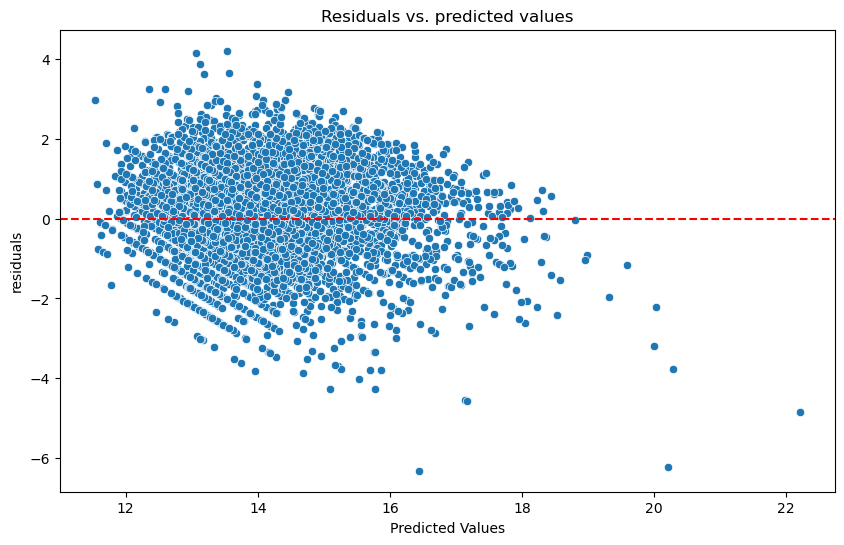

In [128]:
# Lets look at the residuals:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('residuals')
plt.title('Residuals vs. predicted values')
plt.show()

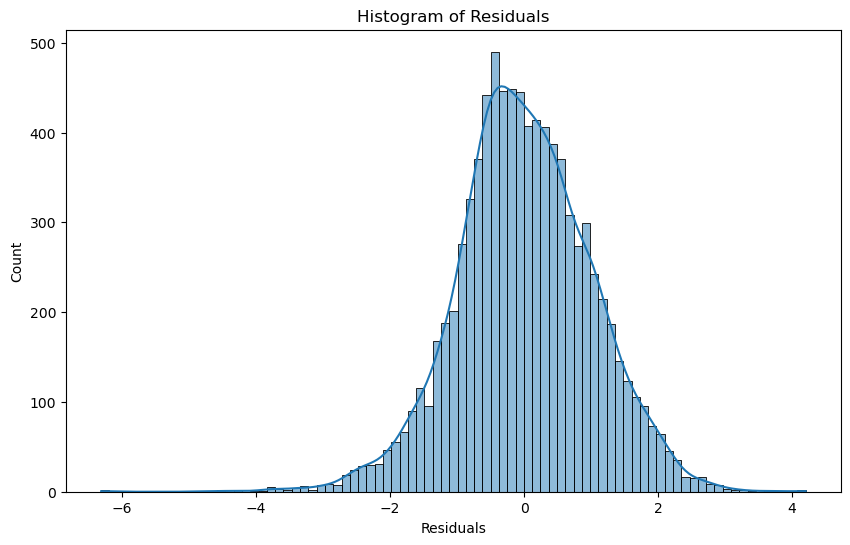

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

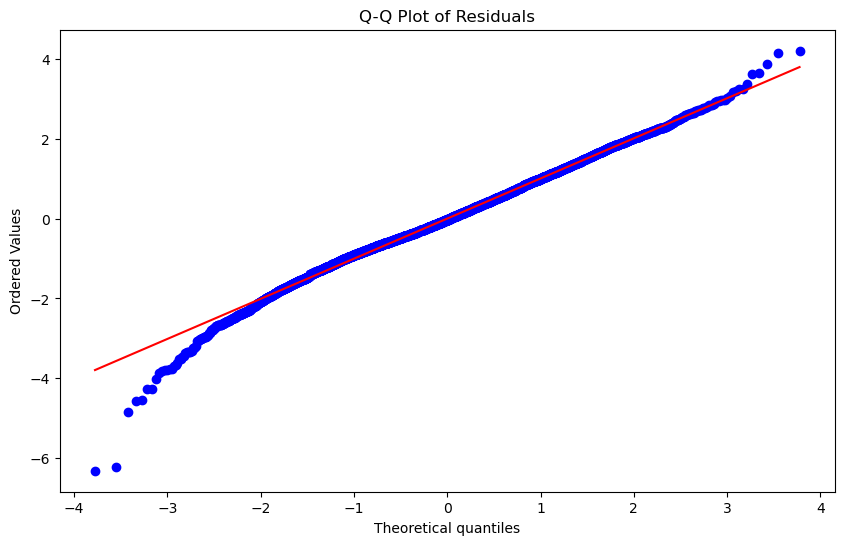

In [96]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [97]:
# This is showing that the errors is roughly normally distributed!

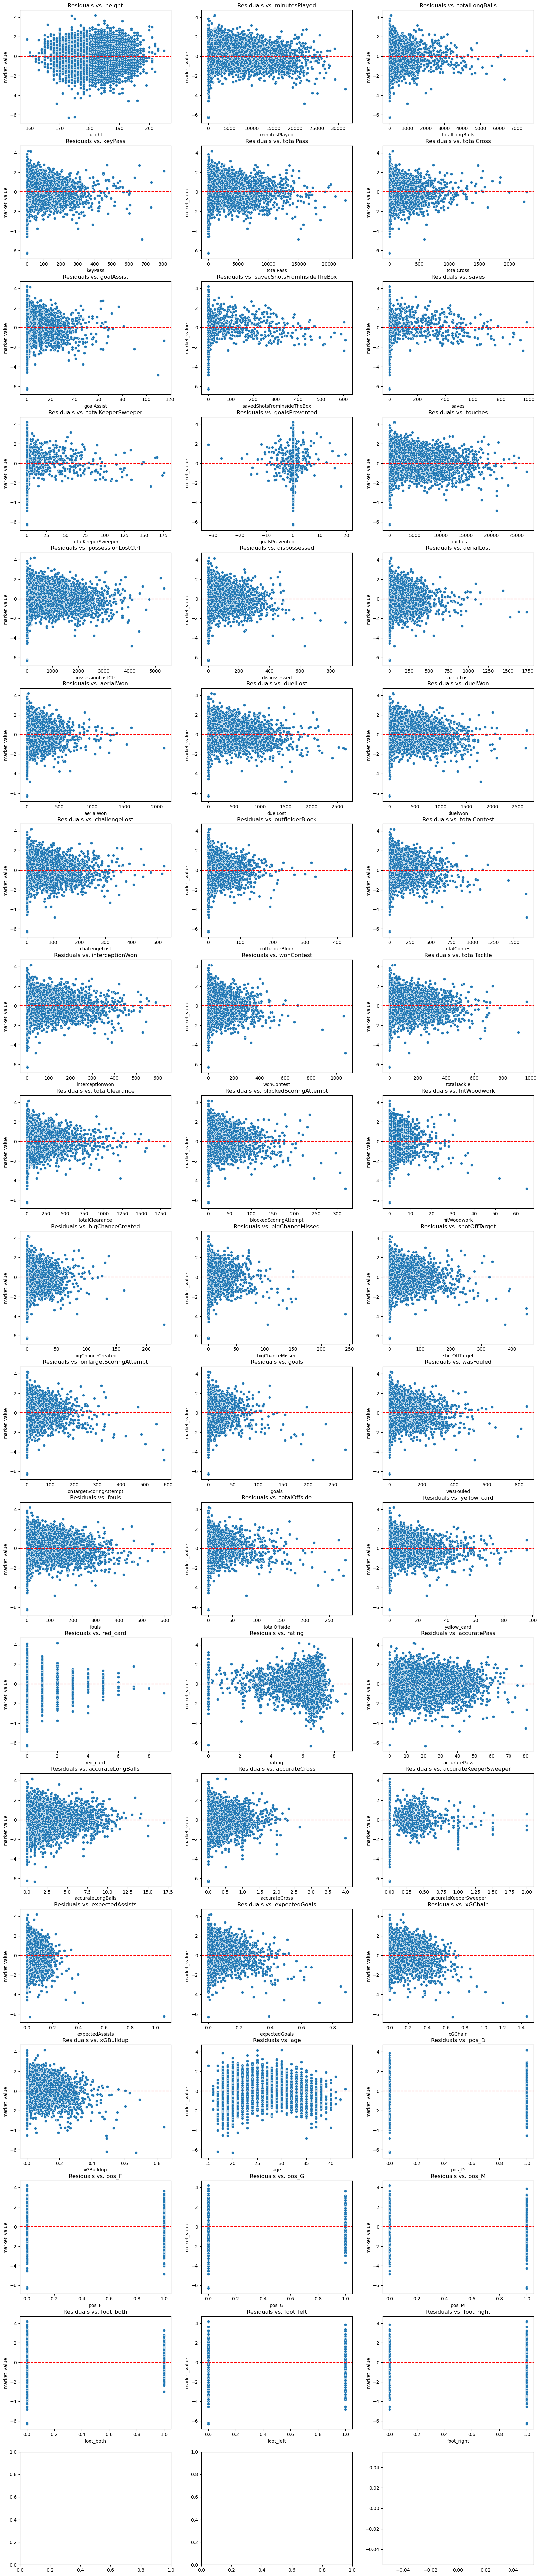

In [98]:
fig,axes = plt.subplots(ncols = 3,nrows=int(len(features)/3)+1,figsize=(20,100))
axes = axes.flatten()
for i, feature in enumerate(X.columns):  
    
    sns.scatterplot(x=X[feature], y=residuals,ax = axes[i])
    axes[i].axhline(0, color='red', linestyle='--')
    #axes[i].xlabel(feature)
    #axes[i].ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {feature}")
    sns.histplot()
plt.show()

In [99]:
# It does not look like any of the features is not normally distributed around 0 with respect to the residuals.

In [100]:
# Lets build a KNN and see how this does
n_neigh = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,60,70,80,90,100]
knnfold = KFold(n_splits=5)

X = train_drop[features]
y = train_drop[target]

train_mses = np.zeros(shape=(len(n_neigh),5))
test_mses = np.zeros(shape=(len(n_neigh),5))
j = 0
for train_index, ho_index in knnfold.split(train_drop):
    X_train, X_ho = X.iloc[train_index], X.iloc[ho_index]
    y_train, y_ho = y.iloc[train_index], y.iloc[ho_index]

    for i in range(len(n_neigh)):
        pipeline = Pipeline([('scale',StandardScaler()),('knn',KNeighborsRegressor(n_neighbors=n_neigh[i]))])

        pipeline.fit(X_train,y_train)

        y_train_p = pipeline.predict(X_train)
        y_ho_p = pipeline.predict(X_ho)

        train_mses[i][j] = mean_squared_error(y_train,y_train_p)
        test_mses[i][j] = mean_squared_error(y_ho,y_ho_p)
    j+=1

avg_train_mses = np.mean(train_mses,axis=1)
avg_test_mses = np.mean(test_mses,axis=1)
for i in range(len(n_neigh)):
    print(f'KNN with {n_neigh[i]} neighbors')
    print(f'Train MSE mean: {avg_train_mses[i]}')
    print(f'Holdout MSE mean: {avg_test_mses[i]}\n')

KNN with 2 neighbors
Train MSE mean: 0.4350935214446189
Holdout MSE mean: 1.3168027197400822

KNN with 3 neighbors
Train MSE mean: 0.5820137262737299
Holdout MSE mean: 1.183856664611913

KNN with 4 neighbors
Train MSE mean: 0.6668222467391709
Holdout MSE mean: 1.123931780740697

KNN with 5 neighbors
Train MSE mean: 0.721533883144702
Holdout MSE mean: 1.0803334725461184

KNN with 6 neighbors
Train MSE mean: 0.7565479229286296
Holdout MSE mean: 1.0617389790656504

KNN with 7 neighbors
Train MSE mean: 0.7830882741688721
Holdout MSE mean: 1.0528759008224424

KNN with 8 neighbors
Train MSE mean: 0.8052932436706681
Holdout MSE mean: 1.0399521749942306

KNN with 9 neighbors
Train MSE mean: 0.8242812048697445
Holdout MSE mean: 1.0346844007333225

KNN with 10 neighbors
Train MSE mean: 0.8375753340964701
Holdout MSE mean: 1.032635587874815

KNN with 11 neighbors
Train MSE mean: 0.8491900776438192
Holdout MSE mean: 1.030065449710568

KNN with 12 neighbors
Train MSE mean: 0.8606416552171513
Holdou

In general, KNN does about the same as Linear regression, so no real improvement.  

In [101]:
# Lets use a Decision Tree regressor
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = DecisionTreeRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   


MSE for train: mean: 7.873755387610265e-32 std: 8.690957287566777e-33
MSE for test:  mean: 1.4148677817325648  std: 0.057776628521649706

RMSE for train: mean: 2.801743941428542e-16 std: 1.5487502793777092e-17
RMSE for test: mean: 1.1892324886516368 std: 0.02436944127384365

R^2 for train: mean: 1.0 std: 0.0
R^2 for test: mean: 0.31622860051936186 std: 0.04580644972044299

MAE for train: mean: 4.432530228706003e-17 std: 4.8925740002223294e-18
MAE for test: mean: 0.919163755357815 std: 0.017435840990388057

MAPE for train: mean: 3.3440633543744167e-18 std: 3.6067420914696596e-19
MAPE for test: mean: 0.0664730345057481 std: 0.0012104450202810658



Decision Tree Regressor overfits really hard.

In [102]:
#Lets try Random Forest Regression to reduce the overfitting
# Lets use a Decision Tree regressor
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = RandomForestRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.094122336912669 std: 0.001186359578645269
MSE for test:  mean: 0.6677984379938035  std: 0.029849396422879922

RMSE for train: mean: 0.30678749793970184 std: 0.0019411389868917806
RMSE for test: mean: 0.8169838984675751 std: 0.018323417763239525

R^2 for train: mean: 0.9546477386022241 std: 0.0005707144223569796
R^2 for test: mean: 0.677585681148029 std: 0.01653472654150027

MAE for train: mean: 0.23653082302892417 std: 0.0015513119220070006
MAE for test: mean: 0.6350338525988513 std: 0.014200738437351118

MAPE for train: mean: 0.01709002153644118 std: 0.00011703497479052485
MAPE for test: mean: 0.04589880022273269 std: 0.0011274186348221402



In [103]:
# Lets Try Gradient Boosting Regression
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = GradientBoostingRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.5941028302511951 std: 0.0029685404565662835
MSE for test:  mean: 0.6804502934098703  std: 0.023504244808450567

RMSE for train: mean: 0.77077825147944 std: 0.0019280294324019384
RMSE for test: mean: 0.8247694012783569 std: 0.014343225746360096

R^2 for train: mean: 0.7137354289331423 std: 0.0013670316684184902
R^2 for test: mean: 0.6713644565316816 std: 0.01671924238097576

MAE for train: mean: 0.5994432963179318 std: 0.0019771699805418773
MAE for test: mean: 0.6416991782676671 std: 0.01179233241471167

MAPE for train: mean: 0.04342760987294992 std: 0.000152758491443551
MAPE for test: mean: 0.04640301081938808 std: 0.0008498885596613896



In [104]:
# Lets do a Support Vector Regression (SVR)

# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = SVR()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 1.3385861094664313 std: 0.0046597123294016985
MSE for test:  mean: 1.3517347119271883  std: 0.044625793613594734

RMSE for train: mean: 1.1569710697132511 std: 0.0020132841347733667
RMSE for test: mean: 1.1624828624696004 std: 0.01919131031670453

R^2 for train: mean: 0.35500296394231634 std: 0.00379671140360077
R^2 for test: mean: 0.34683909949144875 std: 0.03911699935181778

MAE for train: mean: 0.9147033019933906 std: 0.0013828024316895982
MAE for test: mean: 0.9202601602025009 std: 0.012406351838436934

MAPE for train: mean: 0.06543100622983711 std: 0.00010742510204968497
MAPE for test: mean: 0.06580605724929516 std: 0.0009727541313642263



In [105]:
# Finally, lets try XGBoost
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = XGBRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.13995002521505626 std: 0.00496957589374229
MSE for test:  mean: 0.6889381401773115  std: 0.028422920637131446

RMSE for train: mean: 0.37403982699930644 std: 0.006650791936692568
RMSE for test: mean: 0.8298440894964096 std: 0.017231578720076513

R^2 for train: mean: 0.9325652532485407 std: 0.0024150285714048376
R^2 for test: mean: 0.6673171576598804 std: 0.017345427039716147

MAE for train: mean: 0.27705542200168193 std: 0.004580583503469656
MAE for test: mean: 0.6437831893041442 std: 0.013898805158731748

MAPE for train: mean: 0.020262490344497737 std: 0.0003412927929893756
MAPE for test: mean: 0.046587482039645654 std: 0.0010158983103770718



## Conclusion with these types of models
For our baseline Linear regression, which does really well, but we have that XGBoost does the best in terms of RMSE but it does have a lot more variance, so if we are maybe able to reduce the variance, then we can get a better performance. On the other hand, Gradient Boosting regression just does better then Linear regression  